In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

In [3]:
vix_df = yf.download('^VIX')

[*********************100%%**********************]  1 of 1 completed


In [6]:
vix_df['MA'] = vix_df.Close.rolling('30D').mean()

In [8]:
vix_df_filt = vix_df[vix_df.Close > 1.5 * vix_df.MA]

In [10]:
vix_df_filt

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-08-06,35.910000,35.910000,35.910000,35.910000,35.910000,0,20.330476
1990-08-07,32.750000,32.750000,32.750000,32.750000,32.750000,0,20.895000
1994-04-04,23.610001,28.299999,23.610001,23.870001,23.870001,0,15.487000
1997-10-30,36.709999,38.560001,35.840000,38.200001,38.200001,0,23.360909
2001-09-17,43.200001,44.330002,39.770000,41.759998,41.759998,0,25.810625
...,...,...,...,...,...,...,...
2020-03-19,80.620003,84.260002,68.570000,72.000000,72.000000,0,44.842273
2021-01-27,23.820000,37.209999,23.709999,37.209999,37.209999,0,23.929500
2021-11-26,26.620001,28.990000,23.879999,28.620001,28.620001,0,17.673810


In [14]:
series = pd.Series(vix_df_filt.index).diff() / np.timedelta64(1, 'D') >= 30

In [16]:
series[0] = True

In [18]:
signals = vix_df_filt[series.values]

In [21]:
signals.shape

(21, 7)

In [22]:
signals

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-08-06,35.910000,35.910000,35.910000,35.910000,35.910000,0,20.330476
1994-04-04,23.610001,28.299999,23.610001,23.870001,23.870001,0,15.487000
1997-10-30,36.709999,38.560001,35.840000,38.200001,38.200001,0,23.360909
2001-09-17,43.200001,44.330002,39.770000,41.759998,41.759998,0,25.810625
2007-02-27,12.120000,19.010000,12.100000,18.309999,18.309999,0,10.921905
2008-09-17,31.959999,36.400002,30.250000,36.220001,36.220001,0,23.478095
2010-05-06,25.879999,40.709999,24.430000,32.799999,32.799999,0,18.951364
2011-08-04,24.570000,32.070000,24.309999,31.660000,31.660000,0,20.732273
2014-10-13,21.160000,24.639999,20.520000,24.639999,24.639999,0,15.625714


In [23]:
sp_df = yf.download('^GSPC', start='1990-01-01')

[*********************100%%**********************]  1 of 1 completed


In [24]:
sp_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000
...,...,...,...,...,...,...
2024-02-07,4973.049805,4999.890137,4969.049805,4995.060059,4995.060059,4895590000
2024-02-08,4995.160156,5000.399902,4987.089844,4997.910156,4997.910156,4341860000
2024-02-09,5004.169922,5030.060059,5000.339844,5026.609863,5026.609863,3912990000


In [26]:
from pandas.tseries.offsets import DateOffset

In [31]:
test = sp_df[(sp_df.index >= signals.index[0]) & (sp_df.index <= signals.index[0] + DateOffset(months=6))]

In [34]:
(test.Close.pct_change() + 1).cumprod()

Date
1990-08-06         NaN
1990-08-07    1.001196
1990-08-08    1.011721
1990-08-09    1.016476
1990-08-10    1.003259
                ...   
1991-01-31    1.028407
1991-02-01    1.025775
1991-02-04    1.041593
1991-02-05    1.050324
1991-02-06    1.070687
Name: Close, Length: 129, dtype: float64

In [38]:
returns = []

for i in range(len(signals)):
    subdf = sp_df[(sp_df.index >= signals.index[i]) & (sp_df.index <= signals.index[i] + DateOffset(months=6))]
    
    returns.append((subdf.Close.pct_change() + 1).prod())

In [46]:
pd.Series(returns)[:-2].mean()

1.0787556107406788

In [45]:
pd.Series(returns).min() - 1

-0.3271128380040973

In [47]:
pd.Series(returns) - 1

0     0.070687
1     0.035701
2     0.230247
3     0.122635
4     0.048426
5    -0.327113
6     0.086602
7     0.120685
8     0.116117
9     0.062629
10   -0.026947
11    0.111112
12    0.074374
13    0.072259
14    0.036806
15    0.252754
16    0.172230
17    0.063669
18    0.173482
19   -0.116828
20   -0.089433
dtype: float64

<AxesSubplot:>

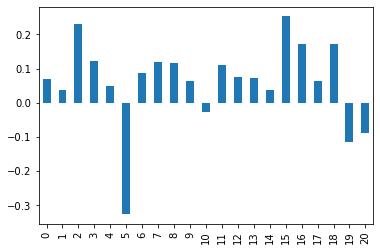

In [49]:
(pd.Series(returns)- 1).plot(kind='bar')